# 설정

In [444]:
import json
from glob import glob

In [445]:
import pandas as pd 

In [446]:
from glob import glob

In [447]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 

In [448]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'

# import, 전처리

In [449]:
file_names = glob("/Users/jyngho/Downloads/MyData//*.json")

In [450]:
b = []

for i in range(len(file_names)):
    ai = pd.read_json(file_names[i])
    b.append(ai)

In [451]:
spotify = pd.concat(b).sort_values(by='ts')

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/2881690783.py:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  spotify = pd.concat(b).sort_values(by='ts')


In [452]:
spotify=spotify.reset_index()

In [453]:
spotify.drop(columns='index',inplace=True)

# EDA

In [606]:
spotify.T

,0,1,2,3,4,5,6,7,8,9,...,235485,235486,235487,235488,235489,235490,235491,235492,235493,235494
ts,2021-02-05T07:38:44Z,2021-02-05T07:42:10Z,2021-02-05T07:43:52Z,2021-02-05T07:46:44Z,2021-02-05T07:50:36Z,2021-02-05T07:54:01Z,2021-02-05T07:57:36Z,2021-02-05T08:00:40Z,2021-02-05T08:03:11Z,2021-02-05T08:03:12Z,...,2023-10-26T13:37:02Z,2023-10-26T13:37:03Z,2023-10-26T13:38:43Z,2023-10-26T13:41:21Z,2023-10-26T13:44:00Z,2023-10-26T14:12:26Z,2023-10-26T14:49:42Z,2023-10-26T14:52:59Z,2023-10-26T14:56:17Z,2023-10-26T14:59:35Z
username,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,...,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4,31woljgnadjmqxsbalebu5oqo5b4
platform,"iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)","iOS 14.0 (iPhone12,8)",...,ios,ios,ios,ios,ios,ios,ios,ios,ios,ios
ms_played,98026,206080,100383,173053,231253,199226,214692,183137,149445,460,...,3710,940,99510,158340,159933,178496,262688,197386,197386,197386
conn_country,KR,KR,KR,KR,KR,KR,KR,KR,KR,KR,...,KR,KR,KR,KR,KR,KR,KR,KR,KR,KR
ip_addr_decrypted,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,39.7.231.186,...,118.235.6.177,118.235.6.177,118.235.6.177,118.235.6.177,118.235.6.177,14.33.234.71,14.33.234.71,14.33.234.71,14.33.234.71,14.33.234.71
user_agent_decrypted,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
master_metadata_track_name,Session 32,Eleven (feat. Summer Walker),CPR,At The Club,Broken Clocks,Remember Me,"GRAVITY (FEAT. TYLER, THE CREATOR)",Something Real (with London On Da Track & Chri...,Hair Down (feat. Kendrick Lamar),Come Over (feat. Popcaan),...,Moto Princess,Rhodanthe,Invincible,Generation,Rising,Invincible,Invincible,Invincible,Invincible,Invincible
master_metadata_album_artist_name,Summer Walker,Khalid,Summer Walker,Jacquees,SZA,UMI,Brent Faiyaz,Summer Walker,SiR,Jorja Smith,...,tripleS,tripleS,tripleS,tripleS,tripleS,tripleS,tripleS,tripleS,tripleS,tripleS
master_metadata_album_album_name,Session 32,Eleven (feat. Summer Walker),Last Day Of Summer,At The Club,Ctrl,Remember Me,"Gravity (feat. Tyler, The Creator)",Something Real (with London On Da Track & Chri...,Chasing Summer,Come Over (feat. Popcaan),...,EVOLution <⟡>,EVOLution <⟡>,EVOLution <⟡>,Acid Angel from Asia <ACCESS>,ASSEMBLE,EVOLution <⟡>,EVOLution <⟡>,EVOLution <⟡>,EVOLution <⟡>,EVOLution <⟡>


## ts

In [456]:
df=spotify.copy()

In [457]:
from datetime import datetime, timedelta

In [458]:
date_string = list(df.ts)

In [459]:
#UTC > KST
date_objects = list(map(lambda x : datetime.fromisoformat(x) + timedelta(hours=9),date_string))

In [460]:
new_date_string=list(map(lambda x : x.strftime("%Y-%m-%d %H:%M:%S"), date_objects))

In [461]:
df.ts = new_date_string

In [462]:
date_time_str = list(df.ts)

In [463]:
date_=list(map(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),date_time_str))

In [464]:
a=[]
for i in range(len(date_)):
    a.append(datetime.date(date_[i]).weekday())

In [465]:
df['weekday']=a

In [466]:
years=[]
months=[]
days=[]
hours=[]
minutes=[]
seconds=[]

for i in range(len(date_)):
    year=date_[i].year
    years.append(year)

    month=date_[i].month
    months.append(month)

    day=date_[i].day
    days.append(day)
    
    hour=date_[i].hour
    hours.append(hour)
    
    minute=date_[i].minute
    minutes.append(minute)
    
    second=date_[i].second
    seconds.append(second)
    
    

In [467]:
df['year'] = years

In [468]:
df['month'] = months

In [469]:
df['day'] = days

In [470]:
df['hour'] = hours

In [471]:
df['minute'] = minutes

In [472]:
df['second'] = seconds

In [473]:
df['ts']=new_date_string

In [607]:
df

,ts,year,month,day,hour,minute,second,weekday,song,artist,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
0,2021-02-05 16:38:44,2021,2,5,16,38,44,금,Session 32,Summer Walker,...,trackdone,False,False,KR,iOS,98,rnb,Session 32 - Summer Walker,2/5,2021_2_5_16
1,2021-02-05 16:42:10,2021,2,5,16,42,10,금,Eleven (feat. Summer Walker),Khalid,...,trackdone,False,False,KR,iOS,206,rnb,Eleven (feat. Summer Walker) - Khalid,2/5,2021_2_5_16
2,2021-02-05 16:43:52,2021,2,5,16,43,52,금,CPR,Summer Walker,...,endplay,False,False,KR,iOS,100,rnb,CPR - Summer Walker,2/5,2021_2_5_16
3,2021-02-05 16:46:44,2021,2,5,16,46,44,금,At The Club,Jacquees,...,trackdone,False,False,KR,iOS,173,rnb,At The Club - Jacquees,2/5,2021_2_5_16
4,2021-02-05 16:50:36,2021,2,5,16,50,36,금,Broken Clocks,SZA,...,trackdone,False,False,KR,iOS,231,rnb,Broken Clocks - SZA,2/5,2021_2_5_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175665,2023-10-26 23:12:26,2023,10,26,23,12,26,목,Invincible,tripleS,...,endplay,False,False,KR,iOS,178,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175666,2023-10-26 23:49:42,2023,10,26,23,49,42,목,Invincible,tripleS,...,trackdone,False,False,KR,iOS,262,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175667,2023-10-26 23:52:59,2023,10,26,23,52,59,목,Invincible,tripleS,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175668,2023-10-26 23:56:17,2023,10,26,23,56,17,목,Invincible,tripleS,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23


## ms_played > s_played

In [474]:
df['ms_played'] = (df.ms_played/1000).astype(int)

In [475]:
df.rename(columns={"ms_played":"s_played"},inplace=True)

## ms_played > 원본 곡 길이

In [476]:
df.dropna(subset=['master_metadata_track_name'], inplace=True)

In [477]:
df.drop(df[df.s_played==0].index,inplace=True)

In [478]:
df["SA"] = df.master_metadata_track_name +"-"+ df.master_metadata_album_artist_name

In [480]:
곡길이=df.groupby('SA')['s_played'].transform(lambda x: x.mode().max() if x.mode().size > 1 else x.mode().iloc[0])

In [481]:
df['곡길이'] = df.groupby('SA')['s_played'].transform(lambda x: x.mode().max() if x.mode().size > 1 else x.mode().iloc[0])

In [482]:
df['곡길이'] = ((df['곡길이']).astype(int)//60).astype(str) +'m '+((df['곡길이']).astype(int)%60).astype(str)+"s "


In [605]:
df.곡길이

0         1m 38s 
1         3m 26s 
2         3m 23s 
3          0m 1s 
4         3m 51s 
           ...   
175665    3m 17s 
175666    3m 17s 
175667    3m 17s 
175668    3m 17s 
175669    3m 17s 
Name: 곡길이, Length: 175670, dtype: object

## s_played = 1삭제

In [484]:
df.drop(df[df.s_played == 1].index,inplace=True)

## platform

In [485]:
platform2 = list(df.platform.str.split(' ').str[0])

In [486]:
df["platform2"] = platform2

In [487]:
df["platform2"].unique()

array(['iOS', 'web_player', 'Windows', 'OS', 'ios', 'osx'], dtype=object)

In [488]:
df["platform2"].replace({'ios':"iOS","web_player":"Windows","os":"Mac",'osx':'Mac'},inplace=True)

## drop columns

In [489]:
df.drop(columns = {"spotify_track_uri", 
                   "spotify_episode_uri",
                   "user_agent_decrypted",
                  "ip_addr_decrypted"},inplace=True)

In [490]:
df.drop(columns = {"username","platform","episode_name","episode_show_name","offline_timestamp","offline"
                  },inplace=True)

## rename, columns  change

In [491]:
df.rename(columns = {"master_metadata_track_name":"song",
           "master_metadata_album_artist_name":"artist",
           "master_metadata_album_album_name":"album"},inplace=True)

In [492]:
df.rename(columns = {"platform2" : "platform"},inplace=True)

In [493]:
df.rename(columns = {"conn_country" : "country"},inplace=True)

In [494]:
df=df[['ts','year', 'month', 'day', 'hour', 'minute', 'second','weekday','song', 'artist', 'album','곡길이',
'reason_start', 'reason_end', 'shuffle', 'skipped','country','incognito_mode','platform','s_played']]

In [495]:
df.drop(columns={'incognito_mode'},inplace=True)

## weekday

In [496]:
df["weekday"].replace({0:"월", 1:"화", 2:"수", 3:"목", 4:"금", 5:"토", 6:"일"}, inplace=True)

## skipped

In [497]:
df.skipped = False

In [498]:
condition = df.s_played < 20

In [499]:
df.loc[condition, 'skipped'] = True

In [500]:
df[df.skipped==True].T

,11,21,38,40,51,60,68,70,76,84,...,235438,235439,235443,235447,235454,235458,235478,235479,235484,235485
ts,2021-02-05 17:03:16,2021-02-05 19:55:41,2021-02-06 08:26:50,2021-02-06 08:27:08,2021-02-06 09:22:23,2021-02-06 09:57:34,2021-02-06 11:22:37,2021-02-06 11:27:41,2021-02-06 11:40:57,2021-02-06 12:45:33,...,2023-10-26 14:42:31,2023-10-26 14:42:34,2023-10-26 14:49:18,2023-10-26 14:53:35,2023-10-26 15:14:09,2023-10-26 15:22:23,2023-10-26 22:31:41,2023-10-26 22:31:49,2023-10-26 22:36:58,2023-10-26 22:37:02
year,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
month,2,2,2,2,2,2,2,2,2,2,...,10,10,10,10,10,10,10,10,10,10
day,5,5,6,6,6,6,6,6,6,6,...,26,26,26,26,26,26,26,26,26,26
hour,17,19,8,8,9,9,11,11,11,12,...,14,14,14,14,15,15,22,22,22,22
minute,3,55,26,27,22,57,22,27,40,45,...,42,42,49,53,14,22,31,31,36,37
second,16,41,50,8,23,34,37,41,57,33,...,31,34,18,35,9,23,41,49,58,2
weekday,금,금,토,토,토,토,토,토,토,토,...,목,목,목,목,목,목,목,목,목,목
song,Come Over (feat. Popcaan),Session 32,Streets,Into It,Candy,Sidewalks,i'm so tired...,Somewhere,Ivy,"Breathe, Be Happy",...,Up To Something,Put You On,nice,HIT EM WHERE IT HURTS,Run,Feel Like,i'll be your xtc,Reminisce Avenue,NASA,Moto Princess
artist,Jorja Smith,Summer Walker,Doja Cat,Chase Atlantic,Doja Cat,The Weeknd,Lauv,JMSN,Frank Ocean,Tep No,...,49th & Main,Royaljag,Amindi,PawPaw Rod,Joji,Verzache,Jadu Jadu,Rioleval,Ariana Grande,tripleS


In [501]:
df.shape

(175670, 19)

## 장르 추가

In [502]:
at1 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_1.csv")
at2 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_2.csv")
at3 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_3.csv")
at4 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_4.csv")
at5 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_5.csv")
at6 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_6.csv")
at7 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_7.csv")
at8 = pd.read_csv("/Users/jyngho/Documents/주피터 /스포티파이분석/df2_artist_8.csv")

In [503]:
a=[at1,at2,at3,at4,at5,at6,at7,at8]

In [504]:
b=pd.concat(a)

In [505]:
c=b[['index','장르']]

In [506]:
c.장르

0      ['pop', 'rnb', 'female vocalists', 'Ariana Gra...
1      ['k-pop', 'Kpop', 'Korean', 'pop', 'female voc...
2      ['k-pop', 'Kpop', 'pop', 'Korean', 'girl group...
3      ['k-pop', 'Kpop', 'rnb', 'pop', 'dance-pop', '...
4      ['female vocalists', 'indie', 'indie pop', 'po...
                             ...                        
989    ['k-pop', 'Kpop', 'Korean', 'girl group', 'pop...
990    ['dream pop', 'chillwave', 'Lo-Fi', 'ambient',...
991    ['hyperpop', 'pop', 'bubblegum bass', 'pc musi...
992    ['indie rock', 'rock', 'brazilian post-punk', ...
993    ['Classical', 'instrumental', 'germany', 'soun...
Name: 장르, Length: 7994, dtype: object

In [507]:
#c.장르.str.split(',').str[0].str.split('').str[3:].str.join('').str.strip("'")
gr = c.장르.str.split(',').str[0].str.split('').str[3:].str.join('').str.strip("'").str.strip("']")
gr2 = c.장르.str.split(',').str[1].str.split('').str[3:].str.join('').str.strip("'").str.strip("']")

In [508]:
c.장르 = gr
c['장르2'] = gr2

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/4121531028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.장르 = gr


In [509]:
c.rename(columns = {'index':'artist','장르':'genre','장르2':'genre2'},inplace=True)

In [510]:
c['장르'] = c.apply(lambda row: row['genre2'] if c['genre'].value_counts().get(row['genre'], 0) == 1 else row['genre'], axis=1)


In [511]:
c=c[['artist','장르']]

In [512]:
c.rename(columns = {'장르':'genre'},inplace=True)

In [513]:
import pandas as pd

# 중복된 artist를 가진 df3 데이터프레임의 unique artist 목록을 가져옴
unique_artists = df['artist'].unique()

# artist와 genre를 저장할 빈 리스트
artists = []
genres = []

# 중복된 artist에 대해 genre 정보를 c 데이터프레임에서 찾아서 리스트에 추가
for artist in unique_artists:
    if artist in c['artist'].values:
        genre = c.loc[c['artist'] == artist, 'genre'].values[0]
    else:
        genre = None  # artist가 c 데이터프레임에 없을 경우 None으로 처리
    artists.append(artist)
    genres.append(genre)

# artist와 genre를 포함한 데이터프레임 생성
artist_genre_df = pd.DataFrame({'artist': artists, 'genre': genres})

# df3에 genre 정보를 추가
df = pd.merge(df, artist_genre_df, on='artist', how='left')


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175670 entries, 0 to 175669
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ts            175670 non-null  object
 1   year          175670 non-null  int64 
 2   month         175670 non-null  int64 
 3   day           175670 non-null  int64 
 4   hour          175670 non-null  int64 
 5   minute        175670 non-null  int64 
 6   second        175670 non-null  int64 
 7   weekday       175670 non-null  object
 8   song          175670 non-null  object
 9   artist        175670 non-null  object
 10  album         175670 non-null  object
 11  곡길이           175670 non-null  object
 12  reason_start  175670 non-null  object
 13  reason_end    175670 non-null  object
 14  shuffle       175670 non-null  bool  
 15  skipped       175670 non-null  bool  
 16  country       175670 non-null  object
 17  platform      175670 non-null  object
 18  s_played      175670 non

In [515]:
list(df.genre.value_counts().reset_index()['index'])

['k-pop',
 'rnb',
 'pop',
 'electronic',
 'Hip-Hop',
 'indie',
 'Korean',
 'indie pop',
 'soul',
 'Lo-Fi',
 'dream pop',
 'female vocalists',
 'country',
 'rap',
 'seen live',
 'jazz',
 'ambient',
 'chillwave',
 'piano',
 'synthpop',
 'indie rock',
 'shoegaze',
 'hip hop',
 'dance',
 'House',
 'french',
 'trance',
 'funk',
 'j-pop',
 'minimal',
 'USA',
 'dubstep',
 'trip-hop',
 'electro',
 'folk',
 'malaysian',
 'british',
 'experimental',
 'algerian',
 'industrial',
 'chillout',
 'better than selena gomez',
 'japanese',
 'Soundtrack',
 'rock',
 'cloud rap',
 'instrumental',
 'Classical',
 'alternative',
 'Belgium',
 'trap',
 'art pop',
 'idm',
 'nu jazz',
 'instrumental hip-hop',
 'UK',
 'techno',
 'chill',
 'hardcore',
 'post-rock',
 'Disco',
 'future garage',
 'mpb',
 'Psychedelic Rock',
 'black metal',
 'france',
 'latin',
 'australian',
 'Grime',
 'beats',
 'indonesia',
 'electropop',
 'heavy metal',
 'bubblegum bass',
 'downtempo',
 'acid jazz',
 'post-hardcore',
 'deep house',
 

# 분석

In [516]:
df['SA'] = df['song'] + ' - ' +  df['artist']

In [517]:
df

,ts,year,month,day,hour,minute,second,weekday,song,artist,...,곡길이,reason_start,reason_end,shuffle,skipped,country,platform,s_played,genre,SA
0,2021-02-05 16:38:44,2021,2,5,16,38,44,금,Session 32,Summer Walker,...,1m 38s,playbtn,trackdone,False,False,KR,iOS,98,rnb,Session 32 - Summer Walker
1,2021-02-05 16:42:10,2021,2,5,16,42,10,금,Eleven (feat. Summer Walker),Khalid,...,3m 26s,trackdone,trackdone,False,False,KR,iOS,206,rnb,Eleven (feat. Summer Walker) - Khalid
2,2021-02-05 16:43:52,2021,2,5,16,43,52,금,CPR,Summer Walker,...,3m 23s,trackdone,endplay,False,False,KR,iOS,100,rnb,CPR - Summer Walker
3,2021-02-05 16:46:44,2021,2,5,16,46,44,금,At The Club,Jacquees,...,0m 1s,playbtn,trackdone,False,False,KR,iOS,173,rnb,At The Club - Jacquees
4,2021-02-05 16:50:36,2021,2,5,16,50,36,금,Broken Clocks,SZA,...,3m 51s,trackdone,trackdone,False,False,KR,iOS,231,rnb,Broken Clocks - SZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175665,2023-10-26 23:12:26,2023,10,26,23,12,26,목,Invincible,tripleS,...,3m 17s,trackdone,endplay,False,False,KR,iOS,178,k-pop,Invincible - tripleS
175666,2023-10-26 23:49:42,2023,10,26,23,49,42,목,Invincible,tripleS,...,3m 17s,clickrow,trackdone,False,False,KR,iOS,262,k-pop,Invincible - tripleS
175667,2023-10-26 23:52:59,2023,10,26,23,52,59,목,Invincible,tripleS,...,3m 17s,trackdone,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS
175668,2023-10-26 23:56:17,2023,10,26,23,56,17,목,Invincible,tripleS,...,3m 17s,trackdone,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS


## most played song

In [518]:
song2021 = df[df.year == 2021].groupby('SA').agg({"s_played":'sum',"SA":"count"}).sort_values(by='s_played',ascending=False)
song2022 = df[df.year == 2022].groupby('SA').agg({"s_played":'sum',"SA":"count"}).sort_values(by='s_played',ascending=False)
song2023 = df[df.year == 2023].groupby('SA').agg({"s_played":'sum',"SA":"count"}).sort_values(by='s_played',ascending=False)


In [519]:
new_palette = ["#3B06EB", "#D5F479", "#AEEDE1", "#DD48A2", "#EA563F"]


In [520]:
song2021.rename(columns={"s_played" : "s", "SA" : "count"},inplace=True)
song2022.rename(columns={"s_played" : "s", "SA" : "count"},inplace=True)
song2023.rename(columns={"s_played" : "s", "SA" : "count"},inplace=True)

In [521]:
song2021.reset_index(inplace=True)
song2022.reset_index(inplace=True)
song2023.reset_index(inplace=True)

In [522]:
song2021['h'] = (song2021.s//60//60).astype(str) + "." + (song2021.s//60%60).astype(str)
song2022['h'] = (song2022.s//60//60).astype(str) + "." + (song2022.s//60%60).astype(str)
song2023['h'] = (song2023.s//60//60).astype(str) + "." + (song2023.s//60%60).astype(str)

In [523]:
song2021['h'] = song2021['h'].astype(float)
song2022['h'] = song2022['h'].astype(float)
song2023['h'] = song2023['h'].astype(float)

In [524]:
song2023.loc[1, 'SA'] = 'Les Preferences - Suzy'

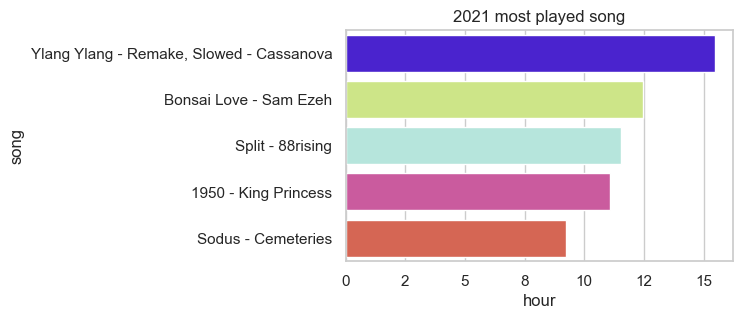

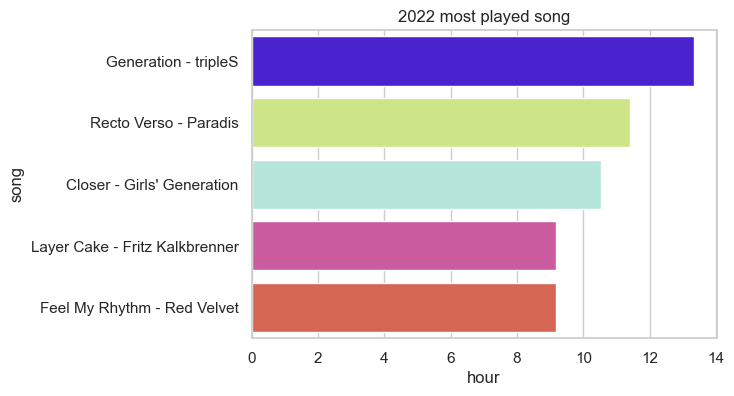

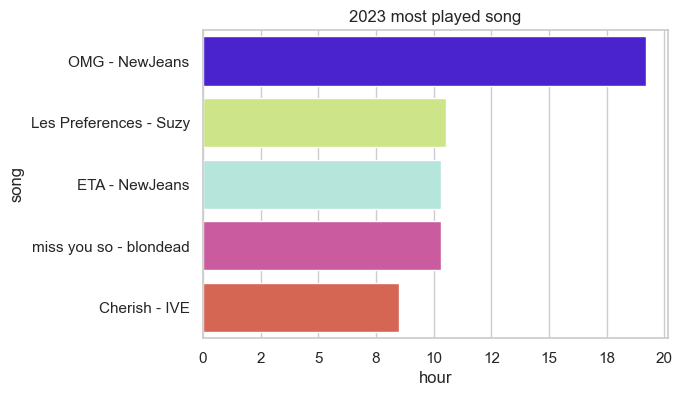

In [525]:
sns.set(style="whitegrid")
sns.set_palette(new_palette)
plt.figure(figsize=(5, 3))
sns.barplot(x='h', y='SA', data=song2021.head(5))
plt.xlabel('hour')  # x축 이름 설정
plt.ylabel('song')  # y축 이름 설정
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.title("2021 most played song")

sns.set(style="whitegrid")
sns.set_palette(new_palette)
plt.figure(figsize=(6, 4))
sns.barplot(x='h', y='SA', data=song2022.head(5))
plt.xlabel('hour')  # x축 이름 설정
plt.ylabel('song')  # y축 이름 설정
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.title("2022 most played song")

sns.set(style="whitegrid")
sns.set_palette(new_palette)
plt.figure(figsize=(6, 4))
sns.barplot(x='h', y='SA', data=song2023.head(5))
plt.xlabel('hour')  # x축 이름 설정
plt.ylabel('song')  # y축 이름 설정
plt.title("2023 most played song")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.show()

In [526]:
song2021

,SA,s,count,h
0,"Ylang Ylang - Remake, Slowed - Cassanova",56788,580,15.46
1,Bonsai Love - Sam Ezeh,46069,345,12.47
2,Split - 88rising,42939,241,11.55
3,1950 - King Princess,40204,204,11.10
4,Sodus - Cemeteries,33843,158,9.24
...,...,...,...,...
8955,Bloody Mary - Lady Gaga,2,1,0.00
8956,Faithful - Drake,2,1,0.00
8957,Fadeaway - Break Science,2,1,0.00
8958,Stickin' (feat. Masego & VanJess) - Sinéad Har...,2,1,0.00


In [527]:
song2022

,SA,s,count,h
0,Generation - tripleS,48948,345,13.35
1,Recto Verso - Paradis,42068,179,11.41
2,Closer - Girls' Generation,39243,197,10.54
3,Layer Cake - Fritz Kalkbrenner,33442,181,9.17
4,Feel My Rhythm - Red Velvet,33438,218,9.17
...,...,...,...,...
10807,Wipe It Up - Jooyoung,2,1,0.00
10808,Winter blossom - Dept,2,1,0.00
10809,Chills - june,2,1,0.00
10810,Child of God - Chance the Rapper,2,1,0.00


In [528]:
song2023

,SA,s,count,h
0,OMG - NewJeans,69572,380,19.19
1,Les Preferences - Suzy,39347,166,10.55
2,ETA - NewJeans,37957,298,10.32
3,miss you so - blondead,37824,183,10.30
4,Cherish - IVE,31817,229,8.50
...,...,...,...,...
10681,Let Me Go - Ogi,2,1,0.00
10682,BREAKDANCE LESSON N.1 - KAYTRANADA,2,1,0.00
10683,A Place In This World - Commentary - Taylor Swift,2,1,0.00
10684,Stuck Inside - Play Nice,2,1,0.00


## most played artist

In [529]:
artist2021 = df[df.year == 2021].groupby('artist').agg({"s_played":'sum',"artist":"count"}).sort_values(by='s_played',ascending=False)
artist2022 = df[df.year == 2022].groupby('artist').agg({"s_played":'sum',"artist":"count"}).sort_values(by='s_played',ascending=False)
artist2023 = df[df.year == 2023].groupby('artist').agg({"s_played":'sum',"artist":"count"}).sort_values(by='s_played',ascending=False)

In [530]:
artist2021['h'] = (artist2021.s_played//60//60).astype(str) + "." + (artist2021.s_played//60%60).astype(str)
artist2022['h'] = (artist2022.s_played//60//60).astype(str) + "." + (artist2022.s_played//60%60).astype(str)
artist2023['h'] = (artist2023.s_played//60//60).astype(str) + "." + (artist2023.s_played//60%60).astype(str)

artist2021['h'] = artist2021['h'].astype(float)
artist2022['h'] = artist2022['h'].astype(float)
artist2023['h'] = artist2023['h'].astype(float)

In [531]:
artist2021.rename(columns={'s_played':'s','artist':'count'},inplace=True)
artist2022.rename(columns={'s_played':'s','artist':'count'},inplace=True)
artist2023.rename(columns={'s_played':'s','artist':'count'},inplace=True)

In [532]:
artist2021.reset_index(inplace=True)
artist2022.reset_index(inplace=True)
artist2023.reset_index(inplace=True)

Text(0.5, 1.0, '2023 most played artist')

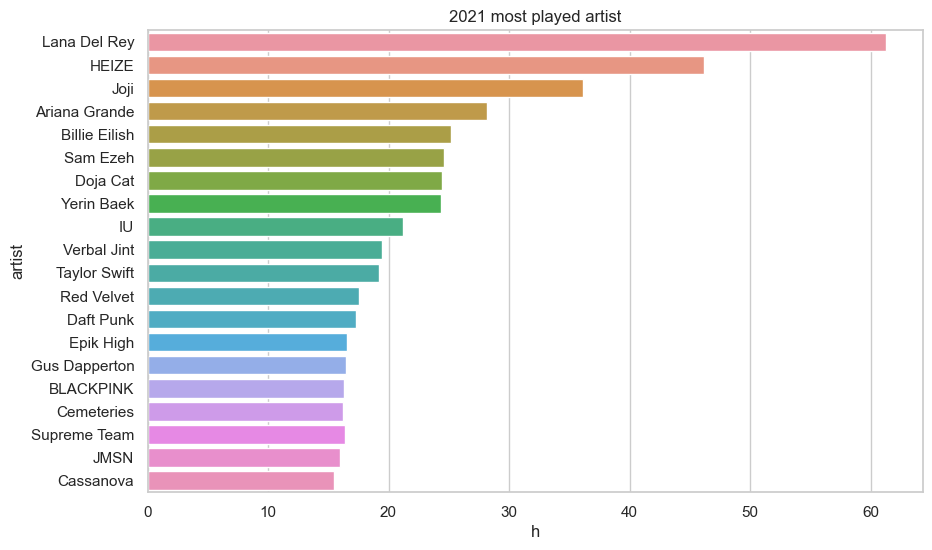

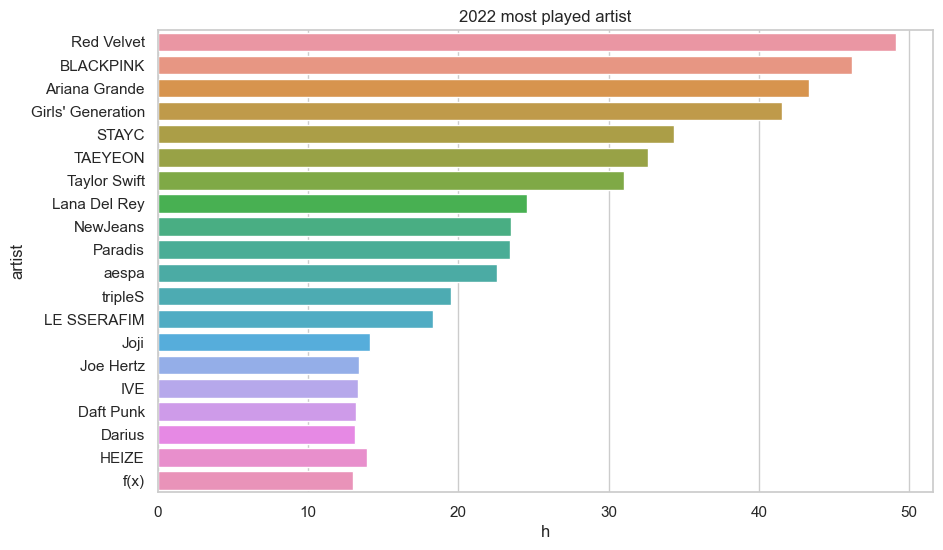

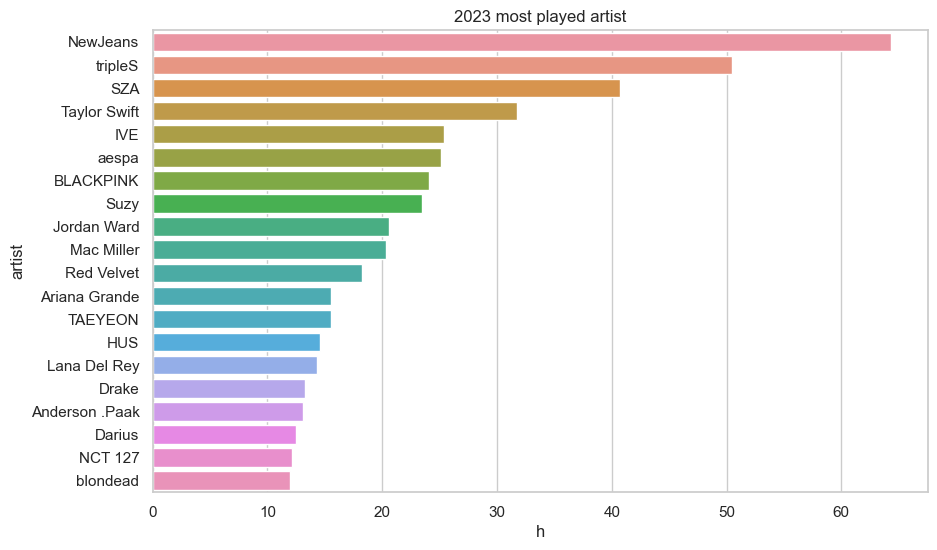

In [533]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='h', y='artist', data=artist2021.head(20))
#plt.xticks(rotation=90)
plt.title("2021 most played artist")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='h', y='artist', data=artist2022.head(20))
#plt.xticks(rotation=90)
plt.title("2022 most played artist")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='h', y='artist', data=artist2023.head(20))
#plt.xticks(rotation=90)
plt.title("2023 most played artist")

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.barplot(x='artist', y='index', data=artists.head(20))
# #plt.xticks(rotation=90)
# plt.title("most played artist")
# plt.show();



In [534]:
artist2021.head(5)

,artist,s,count,h
0,Lana Del Rey,221071,1303,61.24
1,HEIZE,166780,1136,46.19
2,Joji,130224,1216,36.10
3,Ariana Grande,101747,864,28.15
4,Billie Eilish,91353,746,25.22


In [535]:
artist2022.head(5)

,artist,s,count,h
0,Red Velvet,177199,1659,49.13
1,BLACKPINK,166634,1489,46.17
2,Ariana Grande,156709,1819,43.31
3,Girls' Generation,150769,1173,41.52
4,STAYC,124525,1010,34.35


In [536]:
artist2023.head(5)

,artist,s,count,h
0,NewJeans,230589,2134,64.30
1,tripleS,182696,1910,50.44
2,SZA,144421,1687,40.70
3,Taylor Swift,112071,1013,31.70
4,IVE,92440,721,25.40


## 통계

### 요일별

In [537]:
요일별=pd.merge(
df.groupby("weekday")['song'].count().reset_index(),
df.groupby("weekday")['s_played'].sum().reset_index(),
)

스킵곡수=df[df.skipped == True].groupby('weekday')['song'].count().reset_index()

스킵곡수.columns=['weekday','스킵곡수']

요일별통계3년=pd.merge(요일별,스킵곡수)

요일별통계3년['스킵비율'] =요일별통계3년.스킵곡수/요일별통계3년.song

In [538]:
df['월일'] =  df.month.astype(str) +"/"+df.day.astype(str)

In [539]:
df[df.year == 2021].groupby("weekday").get_group("금")

,ts,year,month,day,hour,minute,second,weekday,song,artist,...,reason_start,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일
0,2021-02-05 16:38:44,2021,2,5,16,38,44,금,Session 32,Summer Walker,...,playbtn,trackdone,False,False,KR,iOS,98,rnb,Session 32 - Summer Walker,2/5
1,2021-02-05 16:42:10,2021,2,5,16,42,10,금,Eleven (feat. Summer Walker),Khalid,...,trackdone,trackdone,False,False,KR,iOS,206,rnb,Eleven (feat. Summer Walker) - Khalid,2/5
2,2021-02-05 16:43:52,2021,2,5,16,43,52,금,CPR,Summer Walker,...,trackdone,endplay,False,False,KR,iOS,100,rnb,CPR - Summer Walker,2/5
3,2021-02-05 16:46:44,2021,2,5,16,46,44,금,At The Club,Jacquees,...,playbtn,trackdone,False,False,KR,iOS,173,rnb,At The Club - Jacquees,2/5
4,2021-02-05 16:50:36,2021,2,5,16,50,36,금,Broken Clocks,SZA,...,trackdone,trackdone,False,False,KR,iOS,231,rnb,Broken Clocks - SZA,2/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49775,2021-12-31 22:24:18,2021,12,31,22,24,18,금,My Dear Electra,Q,...,clickrow,trackdone,False,False,KR,iOS,150,industrial,My Dear Electra - Q,12/31
49776,2021-12-31 22:28:58,2021,12,31,22,28,58,금,DEARLY DEPARTED,BROCKHAMPTON,...,trackdone,trackdone,False,False,KR,iOS,280,Hip-Hop,DEARLY DEPARTED - BROCKHAMPTON,12/31
49777,2021-12-31 22:31:15,2021,12,31,22,31,15,금,Anxious,NYK,...,trackdone,remote,True,False,KR,iOS,32,netherlands,Anxious - NYK,12/31
49778,2021-12-31 22:32:57,2021,12,31,22,32,57,금,Before You Get a Boyfriend.,Phony Ppl,...,trackdone,endplay,False,False,KR,iOS,237,Hip-Hop,Before You Get a Boyfriend. - Phony Ppl,12/31


In [540]:
요일별2021=pd.merge(
df[df.year==2021].groupby("weekday")['song'].count().reset_index(),
df[df.year==2021].groupby("weekday")['s_played'].sum().reset_index(),
)

스킵곡수=df[(df.skipped == True) & (df.year==2021)].groupby('weekday')['song'].count().reset_index()

스킵곡수.columns=['weekday','스킵곡수']

요일별통계2021=pd.merge(요일별2021,스킵곡수)

요일별통계2021['스킵비율'] =요일별통계2021.스킵곡수/요일별통계2021.song


요일별통계2021['횟수']=[df[df.year == 2021].groupby("weekday").get_group("금").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("목").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("수").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("월").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("일").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("토").월일.nunique(),
df[df.year == 2021].groupby("weekday").get_group("화").월일.nunique()]

In [541]:
요일별2022=pd.merge(
df[df.year==2022].groupby("weekday")['song'].count().reset_index(),
df[df.year==2022].groupby("weekday")['s_played'].sum().reset_index(),
)

스킵곡수=df[(df.skipped == True) & (df.year==2022)].groupby('weekday')['song'].count().reset_index()

스킵곡수.columns=['weekday','스킵곡수']

요일별통계2022=pd.merge(요일별2022,스킵곡수)

요일별통계2022['스킵비율'] = 요일별통계2022.스킵곡수 / 요일별통계2022.song

In [542]:
df[(df.skipped == True) & (df.year==2021)].T

,9,19,36,37,47,55,62,64,69,77,...,49747,49750,49751,49754,49755,49757,49759,49763,49764,49767
ts,2021-02-05 17:03:16,2021-02-05 19:55:41,2021-02-06 08:26:50,2021-02-06 08:27:08,2021-02-06 09:22:23,2021-02-06 09:57:34,2021-02-06 11:22:37,2021-02-06 11:27:41,2021-02-06 11:40:57,2021-02-06 12:45:33,...,2021-12-31 17:13:32,2021-12-31 17:18:11,2021-12-31 17:18:15,2021-12-31 21:25:53,2021-12-31 21:26:04,2021-12-31 21:29:27,2021-12-31 21:33:18,2021-12-31 21:36:54,2021-12-31 21:36:59,2021-12-31 21:42:31
year,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
month,2,2,2,2,2,2,2,2,2,2,...,12,12,12,12,12,12,12,12,12,12
day,5,5,6,6,6,6,6,6,6,6,...,31,31,31,31,31,31,31,31,31,31
hour,17,19,8,8,9,9,11,11,11,12,...,17,17,17,21,21,21,21,21,21,21
minute,3,55,26,27,22,57,22,27,40,45,...,13,18,18,25,26,29,33,36,36,42
second,16,41,50,8,23,34,37,41,57,33,...,32,11,15,53,4,27,18,54,59,31
weekday,금,금,토,토,토,토,토,토,토,토,...,금,금,금,금,금,금,금,금,금,금
song,Come Over (feat. Popcaan),Session 32,Streets,Into It,Candy,Sidewalks,i'm so tired...,Somewhere,Ivy,"Breathe, Be Happy",...,Now You Know,New Year's Eve,New Year's Eve,Look What You Made Me Do,Endlessly+Tenderly,Over 85,LOVE ME FOR LIFE,Sundress,Sunflower - Spider-Man: Into the Spider-Verse,New Year’s Day
artist,Jorja Smith,Summer Walker,Doja Cat,Chase Atlantic,Doja Cat,The Weeknd,Lauv,JMSN,Frank Ocean,Tep No,...,Will Paquin,MØ,MØ,Taylor Swift,PARADISE RISING,Hojean,BROCKHAMPTON,A$AP Rocky,Post Malone,Taylor Swift


In [543]:
요일별2022=pd.merge(
df[df.year==2022].groupby("weekday")['song'].count().reset_index(),
df[df.year==2022].groupby("weekday")['s_played'].sum().reset_index(),
)

스킵곡수=df[(df.skipped == True) & (df.year==2022)].groupby('weekday')['song'].count().reset_index()

스킵곡수.columns=['weekday','스킵곡수']

요일별통계2022=pd.merge(요일별2022,스킵곡수)

요일별통계2022['스킵비율'] = 요일별통계2022.스킵곡수/요일별통계2022.song


요일별통계2022['횟수']=[df[df.year == 2022].groupby("weekday").get_group("금").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("목").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("수").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("월").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("일").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("토").월일.nunique(),
df[df.year == 2022].groupby("weekday").get_group("화").월일.nunique()]

In [544]:
요일별2023=pd.merge(
df[df.year==2023].groupby("weekday")['song'].count().reset_index(),
df[df.year==2023].groupby("weekday")['s_played'].sum().reset_index(),
)

스킵곡수=df[(df.skipped == True) & (df.year==2023)].groupby('weekday')['song'].count().reset_index()

스킵곡수.columns=['weekday','스킵곡수']

요일별통계2023=pd.merge(요일별2023,스킵곡수)

요일별통계2023['스킵비율'] = 요일별통계2023.스킵곡수/요일별통계2023.song

요일별통계2023['횟수']=[df[df.year == 2023].groupby("weekday").get_group("금").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("목").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("수").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("월").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("일").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("토").월일.nunique(),
df[df.year == 2023].groupby("weekday").get_group("화").월일.nunique()]

In [545]:
요일별통계2021

,weekday,song,s_played,스킵곡수,스킵비율,횟수
0,금,7776,995709,1893,0.243441,48
1,목,7878,996030,2008,0.254887,46
2,수,7171,910735,1849,0.257844,44
3,월,6946,859027,1817,0.261589,47
4,일,6909,821382,2018,0.292083,47
5,토,5554,725271,1325,0.238567,47
6,화,7546,955782,1869,0.247681,46


In [546]:
요일=pd.concat(
    [요일별통계3년,요일별통계2021,요일별통계2022,요일별통계2023],
    keys=['3y','2021','2022','2023']
)

In [547]:
요일.횟수 = 요일.횟수.fillna(1)

In [548]:
요일['횟수'] = 요일.횟수.astype(int)

In [549]:
요일['평균'] = (요일.s_played/요일.횟수).astype(int)

In [550]:
요일['평균'] = ((요일.s_played/요일.횟수).astype(int) // 3600).astype(str) + "시간 " +(((요일.s_played/요일.횟수).astype(int) % 3600)//60).astype(str) + "분 " +(((요일.s_played/요일.횟수).astype(int) % 3600)%60).astype(str) +"초"



In [551]:
요일['평균초'] = ((요일.s_played/요일.횟수).astype(int)).astype(int)

In [552]:
요일.loc['2023'].sort_values(by='스킵비율',ascending=False)

,weekday,song,s_played,스킵곡수,스킵비율,횟수,평균,평균초
4,일,6021,504223,2543,0.422355,43,3시간 15분 26초,11726
2,수,10519,956606,4085,0.388345,43,6시간 10분 46초,22246
1,목,9971,925925,3861,0.387223,43,5시간 58분 53초,21533
3,월,9836,907574,3741,0.380338,43,5시간 51분 46초,21106
0,금,9933,911530,3728,0.375315,42,6시간 1분 43초,21703
6,화,10177,947367,3770,0.370443,43,6시간 7분 11초,22031
5,토,4860,459167,1750,0.360082,41,3시간 6분 39초,11199


### 시간대별

In [553]:
run2021=list(df[(df.year == 2021)].groupby("hour")['s_played'].sum())
run2022=list(df[(df.year == 2022)].groupby("hour")['s_played'].sum())
run2023=list(df[(df.year == 2023)].groupby("hour")['s_played'].sum())
run3y=list(df.groupby("hour")['s_played'].sum())

In [554]:
시간대별런타임=pd.DataFrame([run2021,run2022,run2023,run3y]).T

In [555]:
시간대별런타임.columns=['2021','2022','2023','3y']

In [556]:
시간대별런타임.reset_index(inplace=True)

In [557]:
시간대별런타임.rename(columns = {'index':'hour'},inplace=True)

In [558]:
시간대별런타임.hour = 시간대별런타임.hour.astype(str)

In [559]:
시간=시간대별런타임

In [603]:
시간.sort_values(by='2022',ascending=False)

,hour,2021,2022,2023,3y
17,17,411809,457042,392829,1261680
12,12,352703,441587,339550,1133840
18,18,408353,405783,353142,1167278
11,11,396916,389925,383597,1170438
16,16,388241,383584,388316,1160141
14,14,474719,372174,305224,1152117
13,13,414481,370613,318587,1103681
21,21,291006,341213,313991,946210
22,22,338348,340418,354341,1033107
10,10,301857,322914,313393,938164


### 요일별 평균

In [561]:
df['월일']=df.month.astype(str) +"/"+ df.day.astype(str)

In [562]:
df[df.year == 2021].groupby("weekday").get_group("월").월일.nunique()

47

In [563]:
df[(df.year == 2022)].groupby("weekday")['s_played'].sum()

weekday
금    876164
목    912236
수    943651
월    937152
일    896230
토    802411
화    893289
Name: s_played, dtype: int64

In [564]:
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[0] /60/60) / (df[df.year == 2023].groupby("weekday").get_group("금").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[1] /60/60)/ (df[df.year == 2023].groupby("weekday").get_group("목").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[2]/60/60)/ (df[(df.year == 2023)].groupby('weekday').get_group("수").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[3]/60/60)/ (df[(df.year == 2023)].groupby('weekday').get_group("월").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[4]/60/60)/ (df[(df.year == 2023)].groupby('weekday').get_group("일").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[5]/60/60)/ (df[(df.year == 2023)].groupby('weekday').get_group("토").월일.nunique()),2))
print(round((df[(df.year == 2023)].groupby("weekday")['s_played'].sum()[6]/60/60)/ (df[(df.year == 2023)].groupby('weekday').get_group("화").월일.nunique()),2))

#  f11

6.03
5.98
6.18
5.86
3.26
3.11
6.12


### 년도별 평균

In [565]:
총요일=pd.DataFrame(
    {
    '21' : [(시간['2021'].sum() / 86400)],
    '22' : [(시간['2022'].sum() / 86400)],
    '23' : [(시간['2023'].sum() / 86400)],
    '3y' : [(시간['3y'].sum() / 86400)]
    }
)

In [566]:
총요일 = 총요일.T.reset_index()

In [567]:
총요일.columns = ['년도','일']

In [568]:
총요일

,년도,일
0,21,72.499259
1,22,72.466817
2,23,64.958241
3,3y,209.924317


In [569]:
시간2 = 시간.copy()

In [570]:
df2=df.copy()

In [571]:
df2['월일'] = df2.month.astype(str) + '/' + df2.day.astype(str)

In [572]:
print(df2[(df2.year==2021) & (df2.weekday=='월')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='화')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='수')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='목')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='금')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='토')].월일.nunique())
print(df2[(df2.year==2021) & (df2.weekday=='일')].월일.nunique())


47
46
44
46
48
47
47


In [573]:
print(df2[(df2.year==2022) & (df2.weekday=='월')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='화')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='수')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='목')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='금')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='토')].월일.nunique())
print(df2[(df2.year==2022) & (df2.weekday=='일')].월일.nunique())


52
52
52
52
52
53
52


In [574]:
print(df2[(df2.year==2023) & (df2.weekday=='월')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='화')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='수')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='목')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='금')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='토')].월일.nunique())
print(df2[(df2.year==2023) & (df2.weekday=='일')].월일.nunique())


43
43
43
43
42
41
43


### 장르

In [575]:
df[df.year == 2021].groupby("genre").s_played.sum().reset_index().sort_values(by="s_played",ascending=False)


,genre,s_played
201,rnb,977360
186,pop,845551
150,k-pop,630129
24,Korean,467908
104,electronic,436219
...,...,...
69,breakbeat,3
110,ethno ambient,3
141,indonesian,3
219,symphonic metal,3


In [576]:
df[df.year == 2022].groupby("genre").s_played.sum().reset_index().sort_values(by="s_played",ascending=False)


,genre,s_played
161,k-pop,1468326
191,pop,670828
114,electronic,579620
206,rnb,556084
24,Hip-Hop,377898
...,...,...
108,doom metal,2
134,got7,2
232,twee,2
67,argentina,2


In [577]:
df[df.year == 2023].groupby("genre").s_played.sum().reset_index().sort_values(by="s_played",ascending=False)


,genre,s_played
170,k-pop,1435632
225,rnb,776747
124,electronic,500479
211,pop,466402
30,Hip-Hop,443707
...,...,...
46,Post-Industrial,3
246,taiwan,2
33,Italo Disco,2
122,egypt,2


### 월별 합산

#### 2021

In [578]:
#시단위
df[df.year==2021].groupby("month")["s_played"].sum()//60//60

month
2      46
3     121
4     264
5     210
6     181
7     136
8     162
9     159
10    144
11    144
12    168
Name: s_played, dtype: int64

In [579]:
#일단위
print(df[df.year==2021].groupby("month")["s_played"].sum()//60//60//24)#일

print(df[df.year==2021].groupby("month")["s_played"].sum()//60//60%24)#시간

#2021년 2월은 1일 22시간 음악들음 

month
2      1
3      5
4     11
5      8
6      7
7      5
8      6
9      6
10     6
11     6
12     7
Name: s_played, dtype: int64
month
2     22
3      1
4      0
5     18
6     13
7     16
8     18
9     15
10     0
11     0
12     0
Name: s_played, dtype: int64


#### 2022

In [580]:
#시단위
df[df.year==2022].groupby("month")["s_played"].sum()//60//60

month
1     119
2     135
3     163
4     149
5     162
6     138
7     143
8     142
9     145
10    146
11    158
12    133
Name: s_played, dtype: int64

In [581]:
#일단위
print(df[df.year==2022].groupby("month")["s_played"].sum()//60//60//24)#일

print(df[df.year==2022].groupby("month")["s_played"].sum()//60//60%24)#시간

month
1     4
2     5
3     6
4     6
5     6
6     5
7     5
8     5
9     6
10    6
11    6
12    5
Name: s_played, dtype: int64
month
1     23
2     15
3     19
4      5
5     18
6     18
7     23
8     22
9      1
10     2
11    14
12    13
Name: s_played, dtype: int64


#### 2023

In [582]:
#시단위
df[df.year==2023].groupby("month")["s_played"].sum()//60//60

month
1     217
2     144
3     211
4     135
5     141
6     159
7     130
8     139
9     148
10    130
Name: s_played, dtype: int64

In [583]:
#일단위
print(df[df.year==2023].groupby("month")["s_played"].sum()//60//60//24)#일

print(df[df.year==2023].groupby("month")["s_played"].sum()//60//60%24)#시간


month
1     9
2     6
3     8
4     5
5     5
6     6
7     5
8     5
9     6
10    5
Name: s_played, dtype: int64
month
1      1
2      0
3     19
4     15
5     21
6     15
7     10
8     19
9      4
10    10
Name: s_played, dtype: int64


## better than selena gomez

In [584]:
asdf=df.genre.value_counts().reset_index()

In [585]:
df.genre.str.contains('better than selena gomez').sum()

363

In [586]:
df[df.genre == 'better than selena gomez'].artist.value_counts()

LEEBADA     340
Saweetie     21
CHANMINA      2
Name: artist, dtype: int64

## 시각화_3개년 런타임_평균

In [587]:
요일

weekday   song  s_played  스킵곡수      스킵비율  횟수             평균      평균초
3y   0       금  27311   2783403  9470  0.346747   1   773시간 10분 3초  2783403
     1       목  27186   2834191  9271  0.341021   1  787시간 16분 31초  2834191
     2       수  27086   2810992  9296  0.343203   1  780시간 49분 52초  2810992
     3       월  26372   2703753  8991  0.340930   1   751시간 2분 33초  2703753
     4       일  21803   2221835  7731  0.354584   1  617시간 10분 35초  2221835
     5       토  18769   1986849  6256  0.333316   1   551시간 54분 9초  1986849
     6       화  27143   2796438  9200  0.338946   1  776시간 47분 18초  2796438
2021 0       금   7776    995709  1893  0.243441  48    5시간 45분 43초    20743
     1       목   7878    996030  2008  0.254887  46     6시간 0분 52초    21652
     2       수   7171    910735  1849  0.257844  44    5시간 44분 58초    20698
     3       월   6946    859027  1817  0.261589  47     5시간 4분 37초    18277
     4       일   6909    821382  2018  0.292083  47    4시간 51분 16초    17476
     5       토   5554    725271  1325  0.238567  47    4시간 17분 11초    15431
     6       화   7546    955782  1869  0.247681  46    5시간 46분 17초    20777
2022 0       금   9602    876164  3849  0.400854  52    4시간 40분 49초    16849
     1       목   9337    912236  3402  0.364357  52    4시간 52분 23초    17543
     2       수   9396    943651  3362  0.357812  52     5시간 2분 27초    18147
     3       월   9590    937152  3433  0.357977  52     5시간 0분 22초    18022
     4       일   8873    896230  3170  0.357264  52    4시간 47분 15초    17235
     5       토   8355    802411  3181  0.380730  53    4시간 12분 19초    15139
     6       화   9420    893289  3561  0.378025  52    4시간 46분 18초    17178
2023 0       금   9933    911530  3728  0.375315  42     6시간 1분 43초    21703
     1       목   9971    925925  3861  0.387223  43    5시간 58분 53초    21533
     2       수  10519    956606  4085  0.388345  43    6시간 10분 46초    22246
     3       월   9836    907574  3741  0.380338  43    5시간 51분 46초    21106
     4       일   6021    504223  2543  0.422355  43    3시간 15분 26초    11726
     5       토   4860    459167  1750  0.360082  41     3시간 6분 39초    11199
     6       화  10177    947367  3770  0.370443  43     6시간 7분 11초    22031

/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.pri

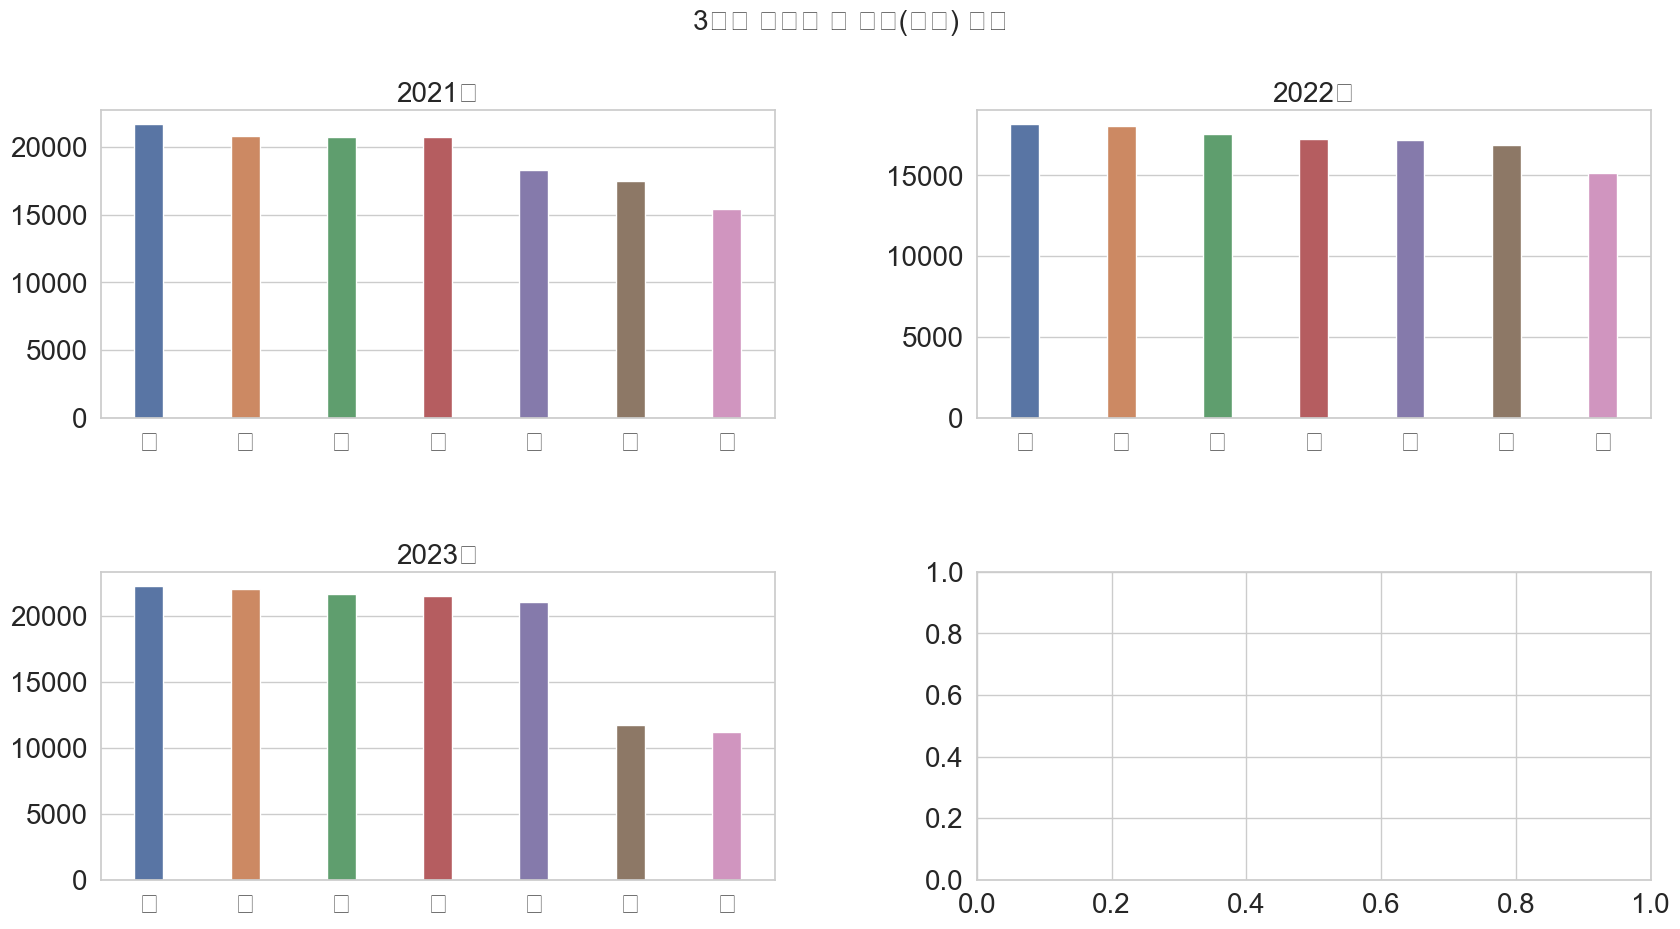

In [588]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [20,10])
fig.suptitle("3개년 런타임 긴 요일(평균) 순위", fontsize=20)


a=sns.barplot(
    x='weekday',
    y='평균초',
    data = 요일.loc['2021'].sort_values(by='평균초',ascending=False),
    ax=ax[0,0],
    width=0.3)
a.set(title="2021년", xlabel=None, ylabel=None)


b=sns.barplot(
    x='weekday',
    y='평균초',
    data = 요일.loc['2022'].sort_values(by='평균초',ascending=False),
    ax=ax[0,1],
    width=0.3)
b.set(title="2022년", xlabel=None, ylabel=None)


c=sns.barplot(
    x='weekday',
    y='평균초',
    data = 요일.loc['2023'].sort_values(by='평균초',ascending=False),
    ax=ax[1,0],
    width=0.3)
c.set(title="2023년", xlabel=None, ylabel=None)


# d=sns.barplot(
#     x='weekday',
#     y='평균',
#     data = 요일.loc['3y'].sort_values(by='평균',ascending=False),
#     ax=ax[1,1],
#     width=0.3)
# d.set(title="3년총", xlabel=None, ylabel=None)

for row in ax:
    for subplot in row:
        subplot.tick_params(axis='x', labelsize=20)
        subplot.tick_params(axis='y', labelsize=20)
        subplot.title.set_fontsize(20)
        
plt.subplots_adjust(hspace=0.5)  # 원하는 간격 설정
plt.subplots_adjust(wspace=0.3)

plt.show()



In [589]:
요일.loc['2021'].sort_values(by='스킵비율',ascending=False)

,weekday,song,s_played,스킵곡수,스킵비율,횟수,평균,평균초
4,일,6909,821382,2018,0.292083,47,4시간 51분 16초,17476
3,월,6946,859027,1817,0.261589,47,5시간 4분 37초,18277
2,수,7171,910735,1849,0.257844,44,5시간 44분 58초,20698
1,목,7878,996030,2008,0.254887,46,6시간 0분 52초,21652
6,화,7546,955782,1869,0.247681,46,5시간 46분 17초,20777
0,금,7776,995709,1893,0.243441,48,5시간 45분 43초,20743
5,토,5554,725271,1325,0.238567,47,4시간 17분 11초,15431


In [590]:
요일.loc['2022'].sort_values(by='스킵비율',ascending=False)

,weekday,song,s_played,스킵곡수,스킵비율,횟수,평균,평균초
0,금,9602,876164,3849,0.400854,52,4시간 40분 49초,16849
5,토,8355,802411,3181,0.380730,53,4시간 12분 19초,15139
6,화,9420,893289,3561,0.378025,52,4시간 46분 18초,17178
1,목,9337,912236,3402,0.364357,52,4시간 52분 23초,17543
3,월,9590,937152,3433,0.357977,52,5시간 0분 22초,18022
2,수,9396,943651,3362,0.357812,52,5시간 2분 27초,18147
4,일,8873,896230,3170,0.357264,52,4시간 47분 15초,17235


In [591]:
요일.loc['2023'].sort_values(by='스킵비율',ascending=False)

,weekday,song,s_played,스킵곡수,스킵비율,횟수,평균,평균초
4,일,6021,504223,2543,0.422355,43,3시간 15분 26초,11726
2,수,10519,956606,4085,0.388345,43,6시간 10분 46초,22246
1,목,9971,925925,3861,0.387223,43,5시간 58분 53초,21533
3,월,9836,907574,3741,0.380338,43,5시간 51분 46초,21106
0,금,9933,911530,3728,0.375315,42,6시간 1분 43초,21703
6,화,10177,947367,3770,0.370443,43,6시간 7분 11초,22031
5,토,4860,459167,1750,0.360082,41,3시간 6분 39초,11199


In [592]:
요일.loc['3y'].sort_values(by='스킵비율',ascending=False)

,weekday,song,s_played,스킵곡수,스킵비율,횟수,평균,평균초
4,일,21803,2221835,7731,0.354584,1,617시간 10분 35초,2221835
0,금,27311,2783403,9470,0.346747,1,773시간 10분 3초,2783403
2,수,27086,2810992,9296,0.343203,1,780시간 49분 52초,2810992
1,목,27186,2834191,9271,0.341021,1,787시간 16분 31초,2834191
3,월,26372,2703753,8991,0.340930,1,751시간 2분 33초,2703753
6,화,27143,2796438,9200,0.338946,1,776시간 47분 18초,2796438
5,토,18769,1986849,6256,0.333316,1,551시간 54분 9초,1986849


## 시각화_3개년 스킵

/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jyngho/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print

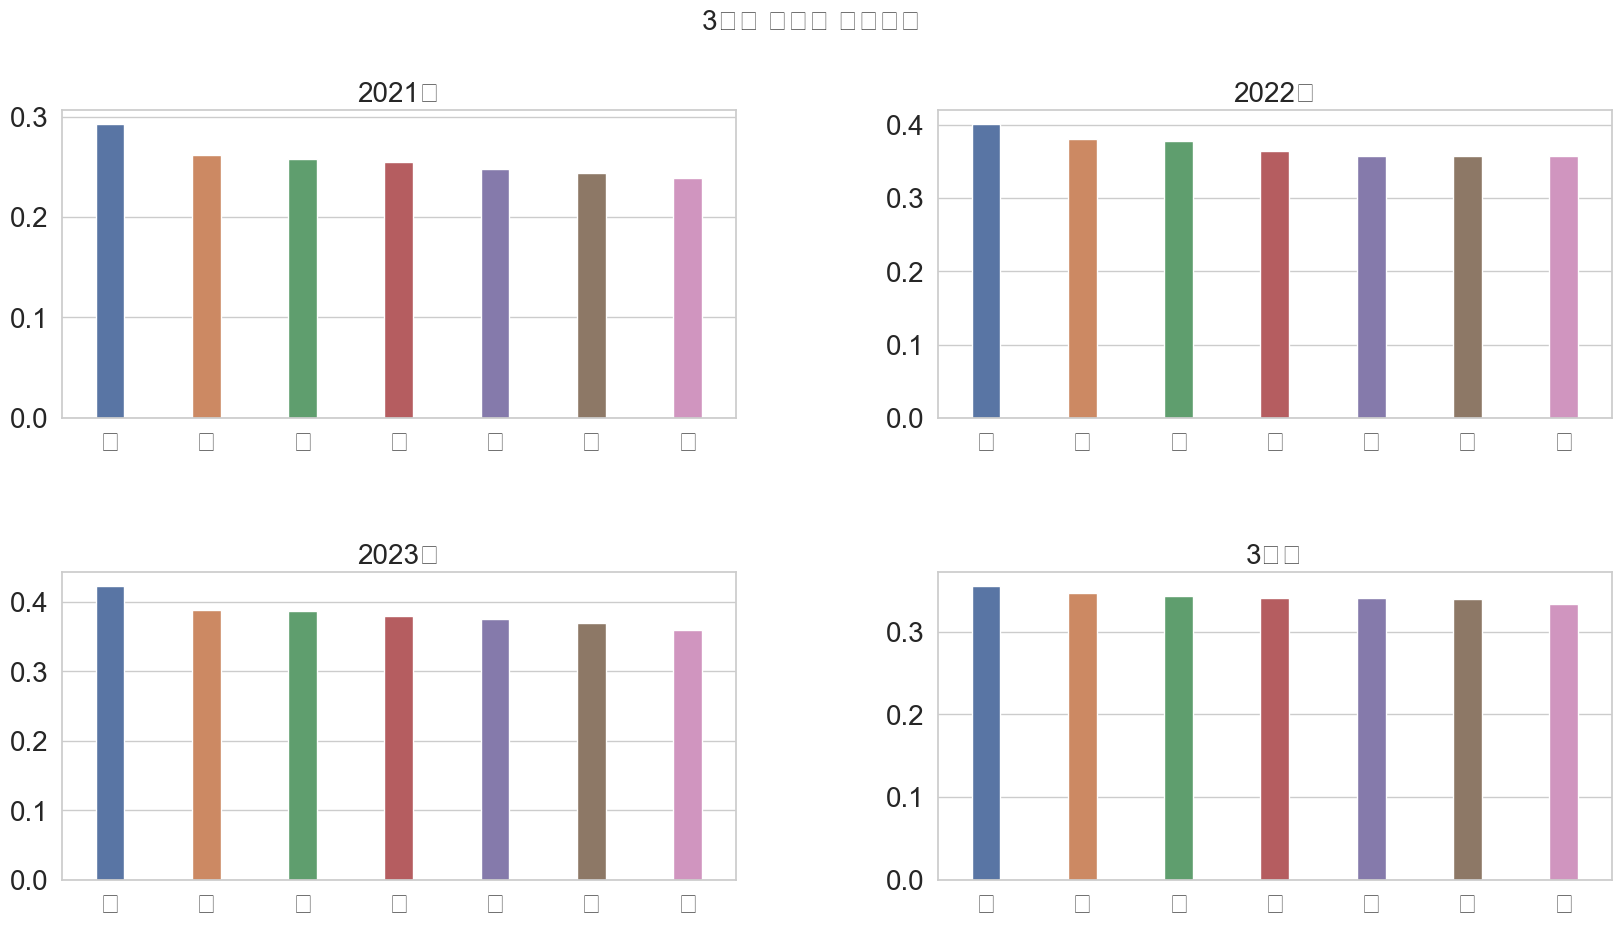

In [593]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [20,10])
fig.suptitle("3개년 요일별 스킵비율", fontsize=20)


a=sns.barplot(
    x='weekday',
    y='스킵비율',
    data = 요일.loc['2021'].sort_values(by='스킵비율',ascending=False),
    ax=ax[0,0],
    width=0.3)
a.set(title="2021년", xlabel=None, ylabel=None)


b=sns.barplot(
    x='weekday',
    y='스킵비율',
    data = 요일.loc['2022'].sort_values(by='스킵비율',ascending=False),
    ax=ax[0,1],
    width=0.3)
b.set(title="2022년", xlabel=None, ylabel=None)


c=sns.barplot(
    x='weekday',
    y='스킵비율',
    data = 요일.loc['2023'].sort_values(by='스킵비율',ascending=False),
    ax=ax[1,0],
    width=0.3)
c.set(title="2023년", xlabel=None, ylabel=None)


d=sns.barplot(
    x='weekday',
    y='스킵비율',
    data = 요일.loc['3y'].sort_values(by='스킵비율',ascending=False),
    ax=ax[1,1],
    width=0.3)
d.set(title="3년총", xlabel=None, ylabel=None)

for row in ax:
    for subplot in row:
        subplot.tick_params(axis='x', labelsize=20)
        subplot.tick_params(axis='y', labelsize=20)
        subplot.title.set_fontsize(20)
        
plt.subplots_adjust(hspace=0.5)  # 원하는 간격 설정
plt.subplots_adjust(wspace=0.3)

plt.show()



## 무한반복재생한음악은?

In [594]:
df['ymdh'] = df.year.astype(str) +"_"+ df.month.astype(str) +"_"+df.day.astype(str)+"_"+df.hour.astype(str)

In [595]:


group_key = (df['SA'] != df['SA'].shift(1)).cumsum()  # 연속되지 않는 값들을 기준으로 그룹화
result = df.groupby(['SA', group_key]).transform('size')

result = result > 40  # 연속해서 3번 이상 나온 값인지 확인



In [596]:
df[result].song.value_counts()

Ylang Ylang - Remake, Slowed        433
Moon - Alternate Version             46
safety net (feat. Ty Dolla $ign)     43
Name: song, dtype: int64

In [597]:
df[result].ymdh.unique()

array(['2021_5_13_10', '2021_5_13_11', '2021_5_13_12', '2021_12_7_17',
       '2021_12_7_18', '2021_12_7_19', '2021_12_7_22', '2021_12_7_23',
       '2021_12_8_0', '2021_12_8_1', '2021_12_8_2', '2021_12_8_3',
       '2021_12_9_9', '2021_12_9_10', '2021_12_9_11', '2021_12_9_23',
       '2021_12_10_0', '2021_12_10_10', '2021_12_10_11', '2021_12_11_11',
       '2021_12_11_12', '2023_3_21_12', '2023_3_21_13'], dtype=object)

In [598]:
df[result].groupby("song")['ymdh'].value_counts()

song                              ymdh         
Moon - Alternate Version          2023_3_21_13     29
                                  2023_3_21_12     17
Ylang Ylang - Remake, Slowed      2021_12_10_0     35
                                  2021_12_7_18     35
                                  2021_12_8_0      35
                                  2021_12_8_1      35
                                  2021_12_8_2      35
                                  2021_12_9_10     35
                                  2021_12_9_11     33
                                  2021_12_7_23     32
                                  2021_12_11_11    31
                                  2021_12_11_12    28
                                  2021_12_7_22     22
                                  2021_12_7_17     15
                                  2021_12_9_23     15
                                  2021_12_9_9      14
                                  2021_12_10_10    12
                                  

In [600]:
df[result].groupby("song").get_group("safety net (feat. Ty Dolla $ign)").sort_values(by='ts')

,ts,year,month,day,hour,minute,second,weekday,song,artist,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
13512,2021-05-13 10:35:01,2021,5,13,10,35,1,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13513,2021-05-13 10:38:56,2021,5,13,10,38,56,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13514,2021-05-13 10:38:56,2021,5,13,10,38,56,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13515,2021-05-13 10:42:25,2021,5,13,10,42,25,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13516,2021-05-13 10:42:25,2021,5,13,10,42,25,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13517,2021-05-13 10:45:54,2021,5,13,10,45,54,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13518,2021-05-13 10:49:23,2021,5,13,10,49,23,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13519,2021-05-13 10:49:23,2021,5,13,10,49,23,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13520,2021-05-13 10:52:54,2021,5,13,10,52,54,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10
13521,2021-05-13 10:56:23,2021,5,13,10,56,23,목,safety net (feat. Ty Dolla $ign),Ariana Grande,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_10


In [165]:
nonono = df[df.song!= "Ylang Ylang - Remake, Slowed"]

In [166]:
nonono[result].ymdh.value_counts()

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/3731056572.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonono[result].ymdh.value_counts()


2023_3_21_13    29
2021_5_13_11    28
2023_3_21_12    17
2021_5_13_10    10
2021_5_13_12     5
Name: ymdh, dtype: int64

In [167]:
nonono[result].song.value_counts()

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/3657344594.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonono[result].song.value_counts()


Moon - Alternate Version            46
safety net (feat. Ty Dolla $ign)    43
Name: song, dtype: int64

In [168]:
nonono[result][nonono[result].ymdh == "2021_5_13_12"]

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/2991635195.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonono[result][nonono[result].ymdh == "2021_5_13_12"]


,year,month,day,hour,minute,second,weekday,song,artist,album,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
13550,2021,5,13,12,2,11,목,safety net (feat. Ty Dolla $ign),Ariana Grande,Positions,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_12
13551,2021,5,13,12,2,11,목,safety net (feat. Ty Dolla $ign),Ariana Grande,Positions,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_12
13552,2021,5,13,12,5,40,목,safety net (feat. Ty Dolla $ign),Ariana Grande,Positions,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_12
13553,2021,5,13,12,9,9,목,safety net (feat. Ty Dolla $ign),Ariana Grande,Positions,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_12
13554,2021,5,13,12,9,9,목,safety net (feat. Ty Dolla $ign),Ariana Grande,Positions,...,trackdone,False,False,KR,Windows,208,pop,safety net (feat. Ty Dolla $ign) - Ariana Grande,5/13,2021_5_13_12


In [169]:
df.iloc[15500:]

,year,month,day,hour,minute,second,weekday,song,artist,album,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
15500,2021,5,23,10,21,10,일,Sure Thing,Miguel,All I Want Is You,...,endplay,True,False,KR,iOS,53,rnb,Sure Thing - Miguel,5/23,2021_5_23_10
15501,2021,5,23,10,21,14,일,Broken Clocks,SZA,Ctrl,...,endplay,True,True,KR,iOS,3,rnb,Broken Clocks - SZA,5/23,2021_5_23_10
15502,2021,5,23,10,25,49,일,Good Days,SZA,Good Days,...,endplay,True,False,KR,iOS,274,rnb,Good Days - SZA,5/23,2021_5_23_10
15503,2021,5,23,10,52,5,일,"But, I am Your Buddy",HEIZE,She's Fine,...,fwdbtn,False,False,KR,iOS,78,rnb,"But, I am Your Buddy - HEIZE",5/23,2021_5_23_10
15504,2021,5,23,10,52,12,일,Wolf,Colde,idealism,...,endplay,False,True,KR,iOS,6,soul,Wolf - Colde,5/23,2021_5_23_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175665,2023,10,26,23,12,26,목,Invincible,tripleS,EVOLution <⟡>,...,endplay,False,False,KR,iOS,178,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175666,2023,10,26,23,49,42,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,262,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175667,2023,10,26,23,52,59,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175668,2023,10,26,23,56,17,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23


In [170]:
nonono

,year,month,day,hour,minute,second,weekday,song,artist,album,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
0,2021,2,5,16,38,44,금,Session 32,Summer Walker,Session 32,...,trackdone,False,False,KR,iOS,98,rnb,Session 32 - Summer Walker,2/5,2021_2_5_16
1,2021,2,5,16,42,10,금,Eleven (feat. Summer Walker),Khalid,Eleven (feat. Summer Walker),...,trackdone,False,False,KR,iOS,206,rnb,Eleven (feat. Summer Walker) - Khalid,2/5,2021_2_5_16
2,2021,2,5,16,43,52,금,CPR,Summer Walker,Last Day Of Summer,...,endplay,False,False,KR,iOS,100,rnb,CPR - Summer Walker,2/5,2021_2_5_16
3,2021,2,5,16,46,44,금,At The Club,Jacquees,At The Club,...,trackdone,False,False,KR,iOS,173,rnb,At The Club - Jacquees,2/5,2021_2_5_16
4,2021,2,5,16,50,36,금,Broken Clocks,SZA,Ctrl,...,trackdone,False,False,KR,iOS,231,rnb,Broken Clocks - SZA,2/5,2021_2_5_16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175665,2023,10,26,23,12,26,목,Invincible,tripleS,EVOLution <⟡>,...,endplay,False,False,KR,iOS,178,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175666,2023,10,26,23,49,42,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,262,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175667,2023,10,26,23,52,59,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23
175668,2023,10,26,23,56,17,목,Invincible,tripleS,EVOLution <⟡>,...,trackdone,False,False,KR,iOS,197,k-pop,Invincible - tripleS,10/26,2023_10_26_23


In [171]:
무한=df[result]

In [172]:
group_key = (무한['ymdh'] != 무한['ymdh'].shift(1)).cumsum()
result = 무한.groupby(['ymdh',group_key]).transform('size')
result = result > 30 

In [173]:
무한[result].ymdh.value_counts()

2021_12_7_18     35
2021_12_8_0      35
2021_12_8_1      35
2021_12_8_2      35
2021_12_9_10     35
2021_12_10_0     35
2021_12_9_11     33
2021_12_7_23     32
2021_12_11_11    31
Name: ymdh, dtype: int64

In [174]:
무한[무한.ymdh == '2021_12_11_11']

,year,month,day,hour,minute,second,weekday,song,artist,album,...,reason_end,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh
46248,2021,12,11,11,8,21,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46249,2021,12,11,11,10,4,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46250,2021,12,11,11,11,47,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46251,2021,12,11,11,13,30,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46252,2021,12,11,11,15,13,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46253,2021,12,11,11,16,56,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46254,2021,12,11,11,18,39,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46255,2021,12,11,11,20,22,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46256,2021,12,11,11,22,5,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11
46257,2021,12,11,11,23,48,토,"Ylang Ylang - Remake, Slowed",Cassanova,Ylang Ylang,...,trackdone,True,False,KR,iOS,102,pop,"Ylang Ylang - Remake, Slowed - Cassanova",12/11,2021_12_11_11


## 가장 노래찾기가 까다로웠던 기간은 언제일까

In [175]:


group_key = (df['SA'] != df['SA'].shift(1)).cumsum()  # 연속되지 않는 값들을 기준으로 그룹화
result = df.groupby(['SA', group_key]).transform('size')

result = result > 40  # 연속해서 3번 이상 나온 값인지 확인



In [176]:
스낍 = df[df.skipped == True]

In [177]:
스낍['ymdhm'] = (스낍.ymdh +"_"+ 스낍.minute.astype(str))

/var/folders/rd/11dvrccd4wq_yh483hnrldfh0000gn/T/ipykernel_17896/3778562214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  스낍['ymdhm'] = (스낍.ymdh +"_"+ 스낍.minute.astype(str))


In [178]:
group_key = (스낍.ymdhm != 스낍.ymdhm.shift(1)).cumsum()  # 연속되지 않는 값들을 기준으로 그룹화

In [179]:
result = 스낍.groupby(['ymdhm', group_key]).transform('size')

In [180]:
result = result > 30

In [181]:
스낍[result]

,year,month,day,hour,minute,second,weekday,song,artist,album,...,shuffle,skipped,country,platform,s_played,genre,SA,월일,ymdh,ymdhm
23394,2021,7,5,20,3,56,월,Keep Doing What You're Doing,Bryson Tiller,A N N I V E R S A R Y,...,True,True,KR,iOS,3,rnb,Keep Doing What You're Doing - Bryson Tiller,7/5,2021_7_5_20,2021_7_5_20_3
23395,2021,7,5,20,3,56,월,Sex Wax,Hether,Sex Wax,...,True,True,KR,iOS,8,indie,Sex Wax - Hether,7/5,2021_7_5_20,2021_7_5_20_3
23396,2021,7,5,20,3,56,월,Dagenham Dream,Blood Orange,Negro Swan,...,True,True,KR,iOS,7,chillwave,Dagenham Dream - Blood Orange,7/5,2021_7_5_20,2021_7_5_20_3
23397,2021,7,5,20,3,56,월,Algorhythm,Childish Gambino,3.15.20,...,True,True,KR,iOS,2,Hip-Hop,Algorhythm - Childish Gambino,7/5,2021_7_5_20,2021_7_5_20_3
23398,2021,7,5,20,3,56,월,Fine Lines,Jorja Smith,"Insecure: Music from the HBO Original Series, ...",...,True,True,KR,iOS,2,rnb,Fine Lines - Jorja Smith,7/5,2021_7_5_20,2021_7_5_20_3
23400,2021,7,5,20,3,56,월,Walk On By,Thundercat,Drunk,...,True,True,KR,iOS,2,funk,Walk On By - Thundercat,7/5,2021_7_5_20,2021_7_5_20_3
23405,2021,7,5,20,3,56,월,Justwanna,Jackson Lundy,Aromatic,...,True,True,KR,iOS,4,american,Justwanna - Jackson Lundy,7/5,2021_7_5_20,2021_7_5_20_3
23406,2021,7,5,20,3,56,월,Together Lonely,Tim Atlas,Together Lonely,...,True,True,KR,iOS,2,indie,Together Lonely - Tim Atlas,7/5,2021_7_5_20,2021_7_5_20_3
23408,2021,7,5,20,3,56,월,Antiriver,Jiwoo,Antiriver,...,True,True,KR,iOS,7,rnb,Antiriver - Jiwoo,7/5,2021_7_5_20,2021_7_5_20_3
23409,2021,7,5,20,3,56,월,isle,pigfrog,pigfrog,...,True,True,KR,iOS,2,k-indie,isle - pigfrog,7/5,2021_7_5_20,2021_7_5_20_3


## 요일별  듣는 노래와 아티스트에 차이가 있을까?

In [182]:
print('월')
print(df2[(df2.weekday == '월')].artist.value_counts().head(10))
print('')
print('화')
print(df2[(df2.weekday == '화')].artist.value_counts().head(10))
print('')
print('수')
print(df2[(df2.weekday == '수')].artist.value_counts().head(10))
print('')
print('목')
print(df2[(df2.weekday == '목')].artist.value_counts().head(10))
print('')
print('금')
print(df2[(df2.weekday == '금')].artist.value_counts().head(10))
print('')
print('토')
print(df2[(df2.weekday == '토')].artist.value_counts().head(10))
print('')
print('일')
print(df2[(df2.weekday == '일')].artist.value_counts().head(10))
print('')

월
Ariana Grande    638
Red Velvet       526
BLACKPINK        468
tripleS          420
Joji             402
NewJeans         374
Taylor Swift     359
TAEYEON          350
Lana Del Rey     314
aespa            298
Name: artist, dtype: int64

화
Ariana Grande    549
Red Velvet       542
NewJeans         490
Taylor Swift     426
Lana Del Rey     396
BLACKPINK        396
tripleS          331
Joji             304
IVE              299
aespa            296
Name: artist, dtype: int64

수
Red Velvet       578
NewJeans         530
Lana Del Rey     516
Ariana Grande    406
tripleS          389
Taylor Swift     372
TAEYEON          309
BLACKPINK        284
aespa            270
SZA              268
Name: artist, dtype: int64

목
Ariana Grande    575
tripleS          506
BLACKPINK        440
Lana Del Rey     424
Joji             381
NewJeans         381
Red Velvet       381
Taylor Swift     324
TAEYEON          317
HEIZE            269
Name: artist, dtype: int64

금
NewJeans             564
BLACKPINK    

In [183]:
list(df2[(df2.weekday == '월')].artist.value_counts().reset_index()['index'])

['Ariana Grande',
 'Red Velvet',
 'BLACKPINK',
 'tripleS',
 'Joji',
 'NewJeans',
 'Taylor Swift',
 'TAEYEON',
 'Lana Del Rey',
 'aespa',
 'SZA',
 'HEIZE',
 'LE SSERAFIM',
 "Girls' Generation",
 'Jordan Ward',
 'Daft Punk',
 'PARADISE RISING',
 'Drake',
 'Grimes',
 'Doja Cat',
 'Frank Ocean',
 'Beyoncé',
 'Sam Ezeh',
 'Miso',
 'Mac Miller',
 'Jorja Smith',
 'STAYC',
 'Yerin Baek',
 'Darius',
 'LeeHi',
 'Mariah the Scientist',
 'Kali Uchis',
 'SEB',
 'Verbal Jint',
 'The Weeknd',
 'IVE',
 'Suzy',
 'BROCKHAMPTON',
 'Gus Dapperton',
 'The Neighbourhood',
 'Gabríel Ólafs',
 'LOONA',
 'IU',
 'Blood Orange',
 'SiR',
 'Charli XCX',
 'Billie Eilish',
 'Paradis',
 'BETWEEN FRIENDS',
 'Anderson .Paak',
 'Lolo Zouaï',
 'Joesef',
 '2NE1',
 'KAYTRANADA',
 'NCT 127',
 'f(x)',
 'Crush',
 'DPR IAN',
 'YENA',
 'Duckwrth',
 'Clairo',
 'Joe Hertz',
 'Halsey',
 'Tyler, The Creator',
 'HyunA',
 'Avril Lavigne',
 'Yuna',
 'Unusual Demont',
 'Summer Walker',
 'The Internet',
 'The Kount',
 'Selena Gomez',
 'L

### LAST FM으로 장르 추가 

In [187]:
# import pylast

# API_KEY = ''
# API_SECRET = ''

# network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET)

# def get_artist_genre(artist):
#     try:
#         artist_obj = network.get_artist(artist)
#         top_tags = artist_obj.get_top_tags()
#         if top_tags:
#             genres = [tag.item.get_name() for tag in top_tags]
#             return genres
#         else:
#             return None
#     except pylast.WSError as e:
#         # 아티스트 정보를 가져오는 중에 오류가 발생한 경우
#         print(f"Error fetching info for artist: {artist} - {e}")
#         return None


In [188]:
# df2_artist=df2.artist.value_counts().reset_index()

In [189]:
# df2_artist_1 = df2_artist.iloc[0:1000]
# df2_artist_2 = df2_artist.iloc[1000:2000]
# df2_artist_3 = df2_artist.iloc[2000:3000]
# df2_artist_4 = df2_artist.iloc[3000:4000]
# df2_artist_5 = df2_artist.iloc[4000:5000]
# df2_artist_6 = df2_artist.iloc[5000:6000]
# df2_artist_7 = df2_artist.iloc[6000:7000]
# df2_artist_8 = df2_artist.iloc[7000:8000]


In [190]:
# df2_artist_8a['장르'] = df2_artist_8['index'].apply(lambda artist: get_artist_genre(artist))

In [ ]:
# df2_artist_8.to_csv("df2_artist_8.csv",index=False)

### 장르카테고리 추가

In [ ]:
# at1 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_1.csv")
# at2 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_2.csv")
# at3 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_3.csv")
# at4 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_4.csv")
# at5 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_5.csv")
# at6 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_6.csv")
# at7 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_7.csv")
# at8 = pd.read_csv("/Users/jyngho/Documents/주피터 /df2_artist_8.csv")

In [ ]:
# a=[at1,at2,at3,at4,at5,at6,at7,at8]

In [ ]:
# b=pd.concat(a)

In [ ]:
# c=b[['index','장르']]

In [ ]:
# gr = c.장르.str.split(',').str[0].str.split('').str[3:].str.join('').str.strip("'")

In [ ]:
# gr

In [ ]:
# c.장르 = gr 

In [ ]:
# df3=df2.copy()

In [ ]:
# c.rename(columns = {'index':'artist','장르':'genre'},inplace=True)

In [ ]:
# import pandas as pd

# # 중복된 artist를 가진 df3 데이터프레임의 unique artist 목록을 가져옴
# unique_artists = df3['artist'].unique()

# # artist와 genre를 저장할 빈 리스트
# artists = []
# genres = []

# # 중복된 artist에 대해 genre 정보를 c 데이터프레임에서 찾아서 리스트에 추가
# for artist in unique_artists:
#     if artist in c['artist'].values:
#         genre = c.loc[c['artist'] == artist, 'genre'].values[0]
#     else:
#         genre = None  # artist가 c 데이터프레임에 없을 경우 None으로 처리
#     artists.append(artist)
#     genres.append(genre)

# # artist와 genre를 포함한 데이터프레임 생성
# artist_genre_df = pd.DataFrame({'artist': artists, 'genre': genres})

# # df3에 genre 정보를 추가
# df3 = pd.merge(df3, artist_genre_df, on='artist', how='left')


In [ ]:
# df3

## 장르순위

In [ ]:
df.genre.value_counts().reset_index()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='genre', data=df2.genre.value_counts().reset_index().head(10))
#plt.xticks(rotation=90)
plt.title("genre")


# 한번 재생하면 보통 몇시간 듣나

In [ ]:
일별재생시간2023 = df[df.year==2023].groupby("월일")['s_played'].sum().reset_index()

In [ ]:
일별재생시간2023.월일.nunique()

In [ ]:
(일별재생시간2023.s_played.sum() / 일별재생시간2023.월일.nunique()).astype(int)//3600 #시간

In [ ]:
((일별재생시간2023.s_played.sum() / 일별재생시간2023.월일.nunique()).astype(int)%3600)//60 #분

In [ ]:
((일별재생시간2023.s_played.sum() / 일별재생시간2023.월일.nunique()).astype(int)%3600)%60 #초